#Regressão

##Importar e Instalar Libs

https://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_function.html

In [ ]:
!pip install pandas plotnine
!pip install pyforest
!pip install dplython

In [218]:
from pyforest import *
from plotnine import *
from dplython import *
from scipy.stats import norm
from sklearn.preprocessing import power_transform

In [3]:
import statsmodels.formula.api as smf

In [4]:
np.set_printoptions(suppress=True) 

<IPython.core.display.Javascript object>

##Importar Base de Dados

In [200]:
bebes=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/bebes.csv')
bebes.head()

<IPython.core.display.Javascript object>

,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25


##Sumário

In [201]:
bebes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
comprimento,74.0,66.921622,12.852386,31.90,56.47,70.4,75.8075,87.63
idade,74.0,25.312162,12.975168,2.15,12.50,26.0,33.0000,60.00


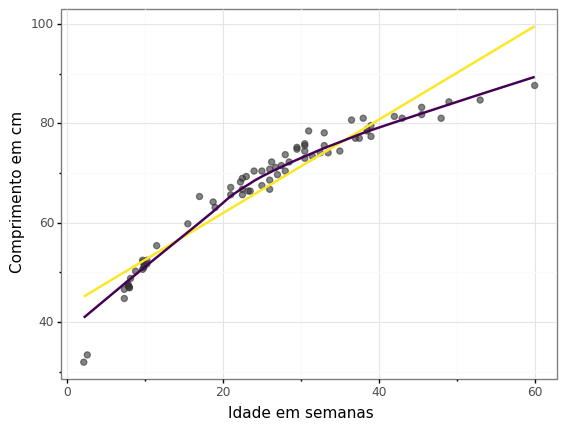

<ggplot: (8754839049329)>

In [202]:
ggplot(bebes, aes('idade', 'comprimento')) + \
  geom_point(color = "#333333", alpha = 0.6, size = 2) + \
  geom_smooth(aes('idade', 'comprimento'),
              method='lm',se=False, color= "#FDE725FF") + \
  geom_smooth(aes('idade','comprimento'),
              color = "#440154FF", se = False) + \
  labs(x = "Idade em semanas", y = "Comprimento em cm") + \
  theme_bw()

In [203]:
X=bebes['idade']
y=bebes['comprimento']

In [204]:
model=smf.ols(formula='comprimento ~ idade', data=bebes)

In [259]:
resultados = model.fit()

In [260]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.72e-38
Time:                        23:55:24   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.0

In [207]:
from scipy.stats import shapiro

In [208]:
W, p_value=shapiro(resultados.resid)

In [209]:
print(f'W {W}')
print(f'p value: {p_value:.9f}')

W 0.9094864130020142
p value: 0.000060124


In [221]:
bebes.drop(['residuos'],axis=1,inplace=True)

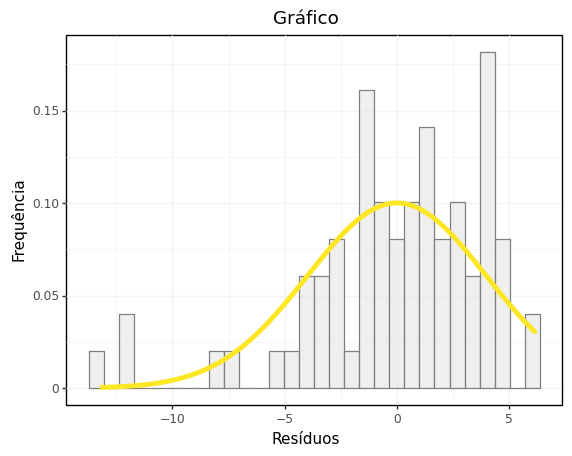

<ggplot: (8754838738889)>

In [231]:
ggplot(bebes >>\
  mutate(residuos=resultados.resid),
         aes(x='residuos')) + \
  geom_histogram(aes(y = '..density..'),
                 color = "#7F7F7F", 
                 fill = "#E5E5E5", 
                 bins = 30,
                 alpha = 0.6) + \
  stat_function(fun=norm.pdf,
                args={'loc':np.mean(resultados.resid),
                      'scale':np.std(resultados.resid)},                
                size = 2,
                color="#FDE725FF") +\
   labs(title="Gráfico",
        x = "Resíduos", 
        y = "Frequência")  +\
   theme(panel_background= element_rect("white"),
        panel_grid = element_line("#F2F2F2"),
        panel_border = element_rect(np.NaN),
        legend_position = "bottom")

In [212]:
from sklearn.preprocessing import PowerTransformer

In [232]:
pt = PowerTransformer(method='box-cox', standardize=False)
pt.fit(bebes['comprimento'].values.reshape(-1, 1))

PowerTransformer(copy=True, method='box-cox', standardize=False)

In [233]:
lambda_bc=pt.lambdas_
lambda_bc

array([2.65905101])

In [234]:
bebes.head()

,comprimento,idade,comprimento_bc
0,63.07,19.00,22966.083193
1,65.63,21.00,25529.065309
2,65.63,22.50,25529.065309
3,66.73,22.50,26682.722356
4,66.37,23.25,26301.657668


In [215]:
bebes['comprimento_bc'] = (bebes['comprimento'] ** lambda_bc - 1)/ lambda_bc

In [235]:
modelo_bc = smf.ols(formula='comprimento_bc ~ idade', data=bebes)

In [310]:
resultados_bc=modelo_bc.fit()

In [258]:
print(resultados_bc.summary())

                            OLS Regression Results                            
Dep. Variable:         comprimento_bc   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           7.16e-53
Time:                        23:55:17   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1602    630.253      7.926      0.0

In [272]:
pd.DataFrame({'R² OLS':resultados.rsquared,
              'R² BoxCOX':resultados_bc.rsquared},index=[0]) 

<IPython.core.display.Javascript object>

,R² OLS,R² BoxCOX
0,0.902668,0.961993


In [276]:
Wb, p_value_bc=shapiro(resultados_bc.resid)

In [278]:
print(f'W {Wb}')
print(f'p value: {p_value_bc:.9f}')

W 0.9764547348022461
p value: 0.181918442


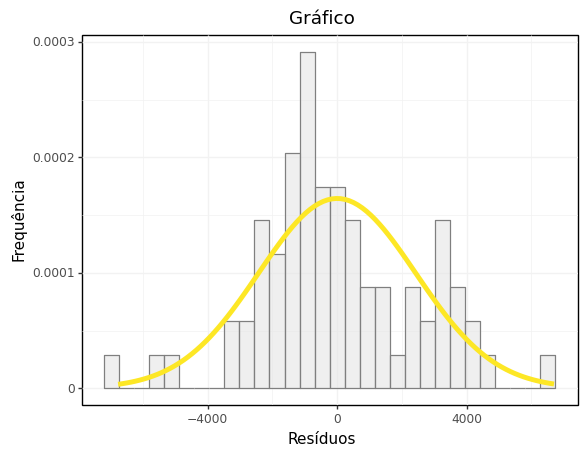

<ggplot: (8754765683953)>

In [275]:
ggplot(bebes >>\
  mutate(residuos=resultados_bc.resid),
         aes(x='residuos')) + \
  geom_histogram(aes(y = '..density..'),
                 color = "#7F7F7F", 
                 fill = "#E5E5E5", 
                 bins = 30,
                 alpha = 0.6) + \
  stat_function(fun=norm.pdf,
                args={'loc':np.mean(resultados_bc.resid),
                      'scale':np.std(resultados_bc.resid)},                
                size = 2,
                color="#FDE725FF") +\
   labs(title="Gráfico",
        x = "Resíduos", 
        y = "Frequência")  +\
   theme(panel_background= element_rect("white"),
        panel_grid = element_line("#F2F2F2"),
        panel_border = element_rect(np.NaN),
        legend_position = "bottom")

In [309]:
model.predict(resultados.params,52)

array([2241.22093548,   48.93708332])

In [308]:
modelo_bc.predict(resultados_bc.params,52)

array([259748.32852435,  49255.94961087])